In [ ]:

# action

In [ ]:
nums.max()
nums.min()
nums.mean()
nums.variance()  #분산
nums.stdev()     #표준편차


In [ ]:
nums.stats() # stats : count mean stdev max min 를 한번에 본다

In [ ]:
g8.take(3)           #3개의 값 가져온다
g8.takeOrdered(3)    #정렬해서 3개의 값 가져오기 (A~Z순)
g8.top(3)            # 맨윗값 가져오기

In [ ]:
nums.count()
nums.countByValue()
nums.countApprox(400, 0.9)  # countApprox(제한시간ms, 신뢰도)  -데이터가 아주 많으면 
                           #근사치로 구한다.

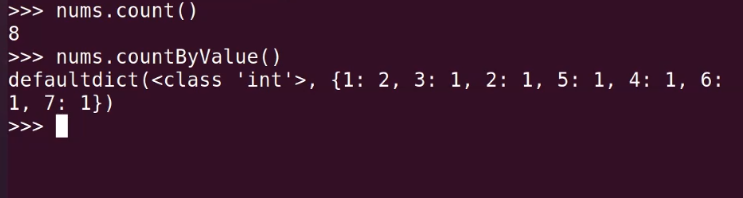

In [ ]:
rdd02.sum()    #250000
rdd02.reduce(lambda x, y: x + y)  #250000

# sum()과 reduce의 차이점
# MAPREDUCE 를 감한해서 생각하면됨(병렬연산 처리.)
# 즉 SUM은 직렬연산 REDUCE는 병렬연산 처리

In [ ]:
# fold(기본값, 연산)
rdd02.fold(0, lambda x, y: x + y)  #250000
# FOLD는 파티션 단위로 연산하는 함수

In [ ]:
rdd02.glom().collect()    
# GLOM 각 파티션 내의 모든 요소를 ​​목록으로 병합하여 생성된 RDD를 반환합니다.

rdd02.aggregate(0, max, lambda x, y: x + y) #1498

# aggregate( zeroValue , seqOp , combOp )
# aggregate( 기본값,각 파티션 단위연산,전체연산)
# https://whereami80.tistory.com/105

In [ ]:
# g8에서 가장 긴 단어 찾자
def g8Max(x, y):
    if len(x) > len(y):
        return x
    else:
        return y

g8.reduce(g8Max)

In [ ]:
# 가장 짧은 단어
g8.reduce(lambda x, y: y if len(x) > len(y) else x)


In [ ]:

g8.saveAsTextFile("/tmp/g8")  #저장
# yarn : hdfs dfs -ls /tmp/g8
# standalone : ls /tmp/g8

In [ ]:
result = sc.textFile("/tmp/g8/part-*")  #파일가져오기 #외부에서 스파크로 

In [ ]:
# key:value
key = g8.keyBy(lambda x:x[0])
key.collect()